In [22]:
# PROBLEM 1
#
# This problem involves two tasks. 
# First, modify the acceleration function 
# to compute the acceleration of the 
# pendulum depending on its position.
# 
# Second, introduce the initial conditions
# described in the video. We want the initial conditions
# to form an ellipse in phase space. The center of
# that ellipse is at x = 2 m and v = 0 m/s. Its semiaxis
# in x direction has a length of 0.25 m, its semiaxis
# in v direction has a length of 2 m/s.
#
# Third, execute the Symplectic Euler Method.
#
# Please note that the order in which you 
# generate your initial conditions matters
# for grading purposes.  Have your first 
# (x, v) coordinate pair be the right-most
# point on the green ellipse, and progress
# counter-clockwise from there.
#

import math
from udacityplots import *
import numpy
import numpy as np
import matplotlib.pyplot as plt

h = 0.05 # s
g = 9.81 # m / s2
length = 1. # m
gravity_vector = acceleration_vector = force = np.array([0, -9.81]) # negative because it is pointing downwards


<tr>
<td> <img src="media/pendulum.jpg" alt="Drawing" style="width: 450px;"/> </td>
<td> <img src="media/radians.png" alt="Drawing" style="width: 450px;"/> </td>
</tr>


Sources:  
https://courses.lumenlearning.com/physics/chapter/16-4-the-simple-pendulum/  
https://www.1728.org/radians.htm


In [26]:
def acceleration(position):
    angle = position/0.25
    acceleration = force * math.sin(math.radians(angle))
    return acceleration

acceleration(0.1)

array([ 0.        , -0.06848616])

In [39]:
def acceleration(position):
    theta = position / length
    return -g * math.sin(theta)
    # Your code here

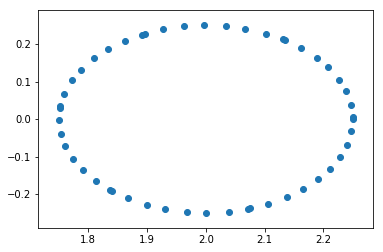

In [37]:
# inital conditions explanation

num_initial_conditions = 50
xt = np.zeros(50)
vt = np.zeros(50)

for i in range(num_initial_conditions):
    phi = i
    xt[i] = 2 + .25*math.cos(phi)
    vt[i] = .25*math.sin(phi)

plt.scatter(xt, vt)

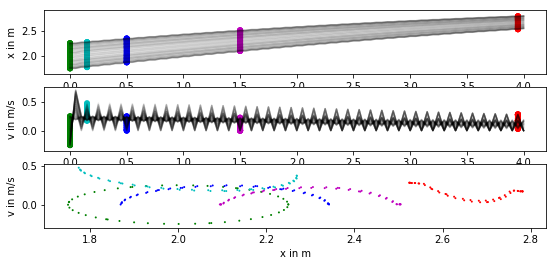

(array([2.07514814, 2.06322623, 2.09675924, 2.10908203, 2.11781613,
        2.1300283 , 2.13860506, 2.15070487, 2.15912054, 2.17110653,
        2.1793576 , 2.19122859, 2.1993118 , 2.21106689, 2.21897924,
        2.23061779, 2.23835648, 2.24987811, 2.2574406 , 2.2688452 ,
        2.27622915, 2.28751684, 2.29472012, 2.30589128, 2.31291196,
        2.3239672 , 2.33080353, 2.34174368, 2.34839411, 2.35922022,
        2.36568335, 2.37639668, 2.38267129, 2.39327329, 2.39935829,
        2.40985063, 2.41574508, 2.42612958, 2.43183267, 2.44211134,
        2.44762238, 2.45779739, 2.4631158 , 2.47318947, 2.47831476,
        2.48828959, 2.49322137, 2.50309997, 2.50783792, 2.51762305,
        2.52216693, 2.53186147, 2.5362111 , 2.54581806, 2.5499733 ,
        2.55949579, 2.56345657, 2.57289782, 2.57666409, 2.58602741,
        2.58959915, 2.59888797, 2.60226519, 2.61148301, 2.61466571,
        2.62381613, 2.62680435, 2.63589102, 2.63868478, 2.64771147,
        2.65031078, 2.6592813 , 2.66168616, 2.67

In [40]:
@show_plot
def symplectic_euler(): 
    axes_x = matplotlib.pyplot.subplot(311)
    axes_x.set_ylabel('x in m')
    axes_v = matplotlib.pyplot.subplot(312)
    axes_v.set_ylabel('v in m/s')
    axes_v.set_xlabel('t in s')
    axes_phase_space = matplotlib.pyplot.subplot(313)
    axes_phase_space.set_xlabel('x in m')
    axes_phase_space.set_ylabel('v in m/s')
    num_steps = 80
    x = numpy.zeros(num_steps + 1) # m around circumference
    v = numpy.zeros(num_steps + 1) # m / s
    colors = [(0, 'g'), (3, 'c'), (10, 'b'), (30, 'm'), (79, 'r')]
    times = h * numpy.arange(num_steps + 1)

    num_initial_conditions = 50

    for i in range(num_initial_conditions):
        phi = i
        x[0] = 2 + .25*math.cos(phi)
        v[0] = .25*math.sin(phi)
        for step in range(num_steps):
            x[step + 1] = x[step] + h * v[step]
            v_vector = v[step] + h * acceleration(x[step+1])
            v[step + 1] = np.linalg.norm(v_vector)
        
        # Don't worry about this part of the function. It's just for making 
        # the plot look a bit nicer.
        axes_x.plot(times, x, c = 'k', alpha = 0.1)
        axes_v.plot(times, v, c = 'k', alpha = 0.1)        
        for step, color in colors:
            # matplotlib.pyplot.hold(True)
            axes_x.scatter(times[step], x[step], c = color, edgecolors = 'none')
            axes_v.scatter(times[step], v[step], c = color, edgecolors = 'none')        
            axes_phase_space.scatter(x[step], v[step], c = color, edgecolors = 'none', s = 4)

    return x, v

symplectic_euler()

In [32]:
x = numpy.zeros(10) # m around circumference
v = numpy.zeros(10) # m / s
phi = 1
x[0] = .25*math.cos(phi)
v[0] = .25*math.sin(phi)
x[1] = x[0] + h * v[0]
v = v[0] + h * acceleration(x[1])

ValueError: setting an array element with a sequence.

In [34]:
np.linalg.norm((v[0] + h * acceleration(x[1])))

0.2940007465920131